In [1]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os



In [2]:
DIRECTORY = r"Face-Mask-Detection\dataset"
CATEGORIES = ["with_mask", "without_mask"]


In [3]:
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")


[INFO] loading images...


In [4]:
data = []
labels = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(image)

        data.append(image)
        labels.append(category)

C:\Users\imane\anaconda3\envs\tensorflow_env\lib\site-packages\PIL\Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [5]:
data

[array([[[-0.46666664, -0.49019605, -0.4352941 ],
         [-0.46666664, -0.49019605, -0.4352941 ],
         [-0.46666664, -0.49019605, -0.4352941 ],
         ...,
         [-0.38823527, -0.6392157 , -0.7411765 ],
         [-0.38823527, -0.6392157 , -0.7411765 ],
         [-0.38823527, -0.6392157 , -0.7411765 ]],
 
        [[-0.46666664, -0.49019605, -0.4352941 ],
         [-0.46666664, -0.49019605, -0.4352941 ],
         [-0.46666664, -0.49019605, -0.4352941 ],
         ...,
         [-0.38823527, -0.6392157 , -0.7411765 ],
         [-0.38823527, -0.6392157 , -0.7411765 ],
         [-0.38823527, -0.6392157 , -0.7411765 ]],
 
        [[-0.3960784 , -0.4588235 , -0.372549  ],
         [-0.3960784 , -0.4588235 , -0.372549  ],
         [-0.3960784 , -0.4588235 , -0.372549  ],
         ...,
         [-0.45098037, -0.62352943, -0.8039216 ],
         [-0.45098037, -0.62352943, -0.8039216 ],
         [-0.45098037, -0.62352943, -0.8039216 ]],
 
        ...,
 
        [[-0.4352941 , -0.6862745 

In [6]:
labels

['with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with

In [7]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [8]:
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [30]:
data

[array([[[-0.46666664, -0.49019605, -0.4352941 ],
         [-0.46666664, -0.49019605, -0.4352941 ],
         [-0.46666664, -0.49019605, -0.4352941 ],
         ...,
         [-0.38823527, -0.6392157 , -0.7411765 ],
         [-0.38823527, -0.6392157 , -0.7411765 ],
         [-0.38823527, -0.6392157 , -0.7411765 ]],
 
        [[-0.46666664, -0.49019605, -0.4352941 ],
         [-0.46666664, -0.49019605, -0.4352941 ],
         [-0.46666664, -0.49019605, -0.4352941 ],
         ...,
         [-0.38823527, -0.6392157 , -0.7411765 ],
         [-0.38823527, -0.6392157 , -0.7411765 ],
         [-0.38823527, -0.6392157 , -0.7411765 ]],
 
        [[-0.3960784 , -0.4588235 , -0.372549  ],
         [-0.3960784 , -0.4588235 , -0.372549  ],
         [-0.3960784 , -0.4588235 , -0.372549  ],
         ...,
         [-0.45098037, -0.62352943, -0.8039216 ],
         [-0.45098037, -0.62352943, -0.8039216 ],
         [-0.45098037, -0.62352943, -0.8039216 ]],
 
        ...,
 
        [[-0.4352941 , -0.6862745 

In [44]:
data = np.array(data, dtype="float32")
labels = np.array(labels)

In [45]:
trainX, testX, trainY, testY = train_test_split(data, labels,test_size=0.20, stratify=labels, random_state=42)

In [47]:
trainX.shape

(3066, 224, 224, 3)

In [11]:
# construct the training image generator for data augmentation
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

In [12]:
# load the MobileNetV2 network, ensuring the head FC layer sets are
# left off
#MobileNets are a class of small, low-latency, low-power models that can be used for classification, detection,and other commmon tasks convolutional neural networks are good for. Because of their small size, these are considered great deep learning models to be used on mobile devices."
baseModel = MobileNetV2(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))


C:\Users\imane\anaconda3\envs\tensorflow_env\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [13]:
baseModel.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [14]:
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

In [15]:

# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

In [16]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________________

In [17]:
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

In [18]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-4
EPOCHS = 20
BS = 32


# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

[INFO] compiling model...


In [48]:

# train the head of the network
print("[INFO] training head...")
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

[INFO] training head...
Train for 95 steps, validate on 767 samples
Epoch 1/20
95/95 [==============================] - 699s 7s/step - loss: 0.5352 - accuracy: 0.7367 - val_loss: 0.5286 - val_accuracy: 0.7188
Epoch 2/20
95/95 [==============================] - 692s 7s/step - loss: 0.2935 - accuracy: 0.8846 - val_loss: 0.3147 - val_accuracy: 0.8668
Epoch 3/20
95/95 [==============================] - 821s 9s/step - loss: 0.2282 - accuracy: 0.9146 - val_loss: 0.3494 - val_accuracy: 0.8614
Epoch 4/20
95/95 [==============================] - 803s 8s/step - loss: 0.1930 - accuracy: 0.9249 - val_loss: 0.3051 - val_accuracy: 0.8777
Epoch 5/20
95/95 [==============================] - 902s 9s/step - loss: 0.1748 - accuracy: 0.9344 - val_loss: 0.2684 - val_accuracy: 0.8872
Epoch 6/20
95/95 [==============================] - 884s 9s/step - loss: 0.1682 - accuracy: 0.9367 - val_loss: 0.4093 - val_accuracy: 0.8641
Epoch 7/20
95/95 [==============================] - 761s 8s/step - loss: 0.1422 - accu

In [49]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)


[INFO] evaluating network...


In [50]:

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

In [51]:
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       1.00      0.79      0.88       383
without_mask       0.83      1.00      0.91       384

    accuracy                           0.90       767
   macro avg       0.91      0.90      0.89       767
weighted avg       0.91      0.90      0.89       767



In [53]:
# serialize the model to disk
print("[INFO] saving mask detector model...")
model.save("mask_detector.model", save_format="h5")

[INFO] saving mask detector model...


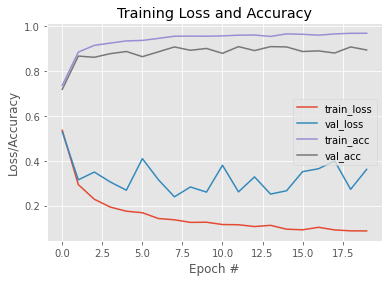

In [55]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc=0)
plt.savefig("plot.png")